# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [2]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [3]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [4]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return 1 / len(X)  * sum((X.dot(w) - y) ** 2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        tr = X.transpose()
        return 2 / len(X) *tr.dot(X.dot(w) - y)

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [5]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [6]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    weights_history = [w.copy()]
    for i in range(n_iterations):
      grad = loss.calc_grad(X, y, w)
      w -= lr * grad
      weights_history.append(w.copy())
    return weights_history

    



Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [7]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [9]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.5891768045028
0.86706443956495


In [10]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.0001


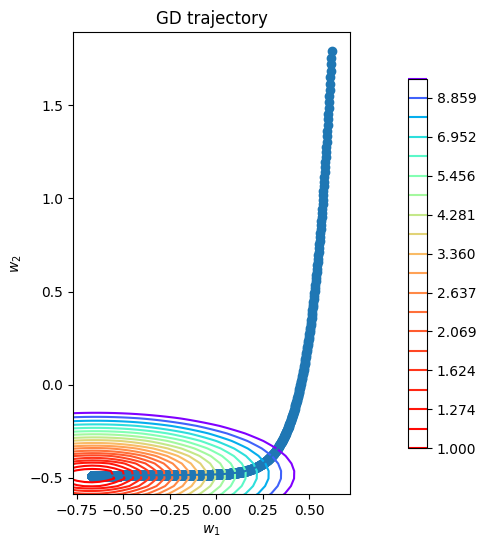

lr = 0.001


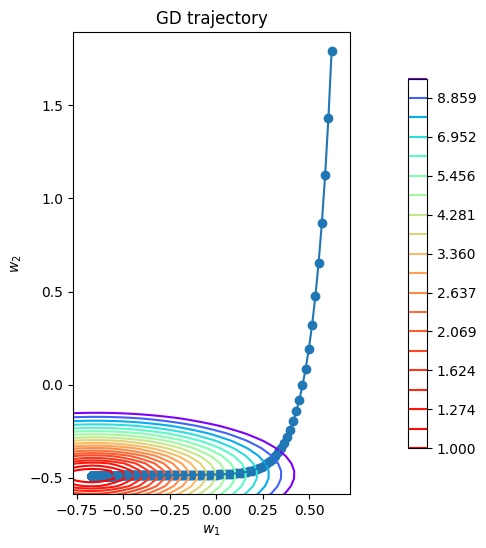

lr = 0.01


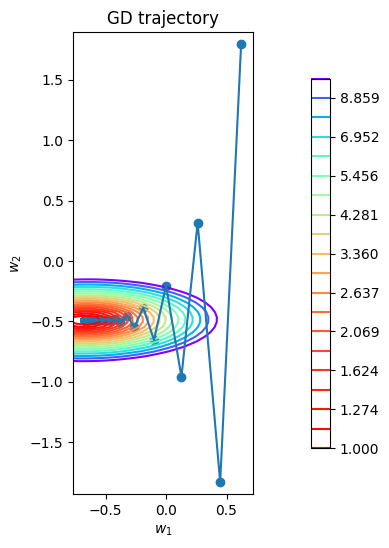

lr = 0.1


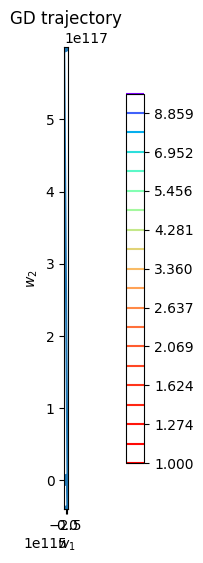

In [48]:
np.random.seed(1337)
n_features = 2
n_objects = 300
batch_size = 10
num_steps = 50
w_true = np.random.normal(size=(n_features,))
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
#lr = 0.0001 Длины шага хватило для минимума по обеим осям. Градиент также ни разу не менял направления, так как шаг слишком невелик, чтобы перепрыгнуть минимум. Где-то в районе -0,25 по w2 градиент стал менять наклон, был почти вертикальным, стал почти горизонтальным. 
print('lr = 0.0001') 
w_list = gradient_descent(w_init, X, y, loss, 0.0001, 100000)
plot_gd(w_list, X, y, loss)
#lr = 0.001 Длины шага хватило для минимума по обеим осям. Градиент также ни разу не менял направления, так как шаг слишком невелик, чтобы перепрыгнуть минимум. Где-то в районе -0,25 по w2 градиент стал менять наклон, был почти вертикальным, стал почти горизонтальным. 
print('lr = 0.001') 
w_list = gradient_descent(w_init, X, y, loss, 0.001, 100000)
plot_gd(w_list, X, y, loss)
#lr = 0.01 Дошли до минимума по двум осям. градиент много раз менял направление, так как шаг достаточно большой, чтобы он перепрыгивал минимум. Впервые градиент начинает перепрыгивать при длине шага примерно 0.0065
print('lr = 0.01') 
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100000)
plot_gd(w_list, X, y, loss)
#lr = 0.1 Слишком длинный шаг, почти нет движения вдоль w1
print('lr = 0.1') 
w_list = gradient_descent(w_init, X, y, loss, 0.1, 100)
plot_gd(w_list, X, y, loss)
# При большом lr у нас шаг длинный, и мы перепрыгиваем минимум. При маленьком lr шаг короткий, и мы равномерно спускаемся. При слишком большом lr мы не можем нормально дойти, так как нас слишком шатает из-за длины шага. Если сделать шаг слишком маленьким, то растет риск не успеть дойти до нужной точки.


Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [12]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    weights_history = [w.copy()]
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        w -= lr * grad
        weights_history.append(w.copy())
    return weights_history
    

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.0001, bs = 5


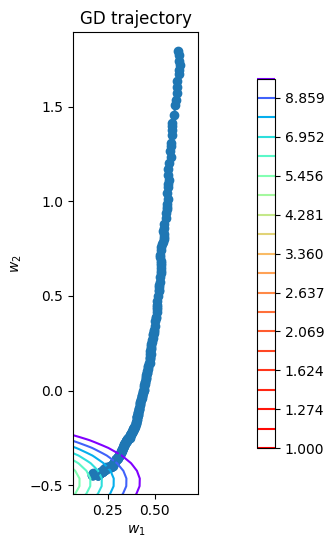

lr = 0.001, bs = 100


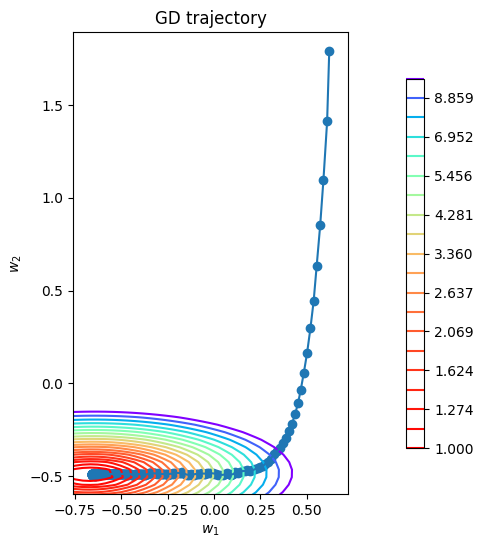

lr = 0.01,  bs = 1


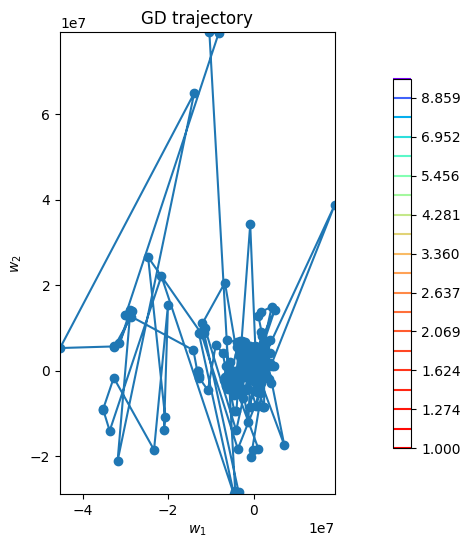

lr = 0.1, bs = 10


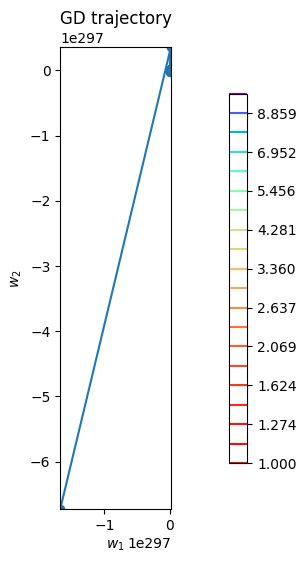

In [13]:
np.random.seed(1337)
n_features = 2
n_objects = 300
num_steps = 50
w_true = np.random.normal(size=(n_features,))
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
#lr = 0.0001, bs = 5  На всех графиках спуск выглядит более "виляющим", видно на каком этапе какой из параметров минимизировался. Чем меньше bs, тем менее равномерно распределены значения шагов (при маленьких bs у нас меньше скопление шагов в начале спуска и больше в конце), и тем больше "виляет" спуск.
print('lr = 0.0001, bs = 5') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.0001, 5, 300)
plot_gd(w_list, X, y, loss)
#lr = 0.001, bs = 100 Достаточное значение bs, lr для относительно гладкого спуска. 
print('lr = 0.001, bs = 100') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.001, 100, 300)
plot_gd(w_list, X, y, loss)
#lr = 0.01, bs = 1 Градиентный спуск курильщика, штырит из-за слишком низкого bs
print('lr = 0.01,  bs = 1') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 1, 300)
plot_gd(w_list, X, y, loss)
#lr = 0.1, bs = 10 Также слишком низкий bs, видно небольшое скопление точек в (0;0)
print('lr = 0.1, bs = 10') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.1, 10, 259)
plot_gd(w_list, X, y, loss)

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [14]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    weights_history = [w.copy()]
    s0 = 1
    for i in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        grad = loss.calc_grad(X_batch, y_batch, w)
        s = (s0 / (s0 + i)) ** p
        w -= lr * s * grad
        weights_history.append(w.copy())
    return weights_history


**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


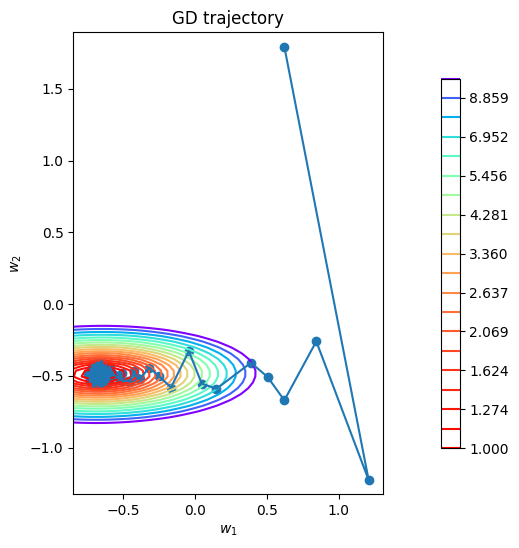

p = 0.33


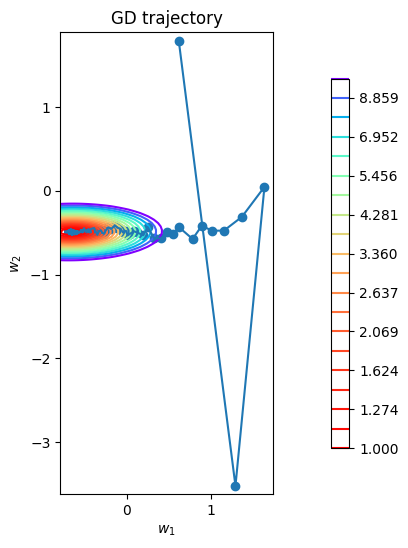

p = 0.66


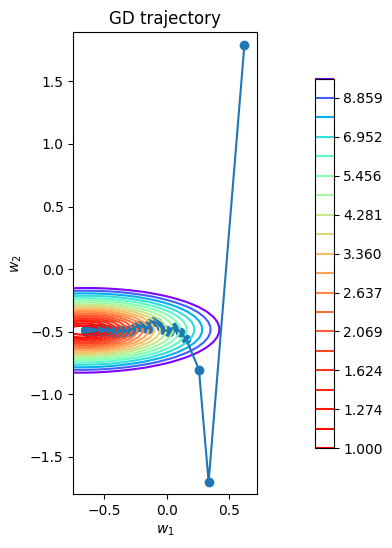

p = 1


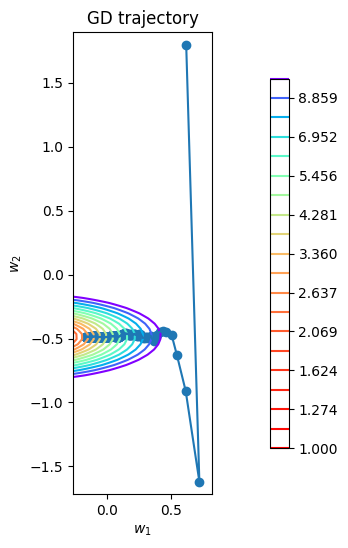

In [15]:
np.random.seed(1337)
n_features = 2
n_objects = 300
num_steps = 50
batch_size = 10
lr = 0.01
w_true = np.random.normal(size=(n_features,))
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))
#p = 0.1  Тк дробь, возводимая в степень р, всегда меньше 1, то при уменьшении р, значение увеличивается (но всегда остается меньше 1), а значит шаг изменяется меньше. Сходимость будет медленной, что и видно на первом графике (в начале большие шаги медленно сановятся меньше, потому в конце у нас много маленьких шагов почти на одном месте, ведь мы быстро дошли до окрестности минимума)
print('p = 0.1') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.1, 1000)
plot_gd(w_list, X, y, loss)
#p = 0.33 Просто смотрим, как с повышением р все становится лучше, 
print('p = 0.33') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.33, 1000)
plot_gd(w_list, X, y, loss)
#p = 0.66 Просто смотрим, как с повышением р все становится лучше
print('p = 0.66') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.66, 1000)
plot_gd(w_list, X, y, loss)
#p = 1 p Вот тут уже слишком большой p, что мы аж не успеваем дойти до минимума, так как шаги слишком быстро становятся маленькими. 
print('p = 1') 
w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 1, 1000)
plot_gd(w_list, X, y, loss)

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

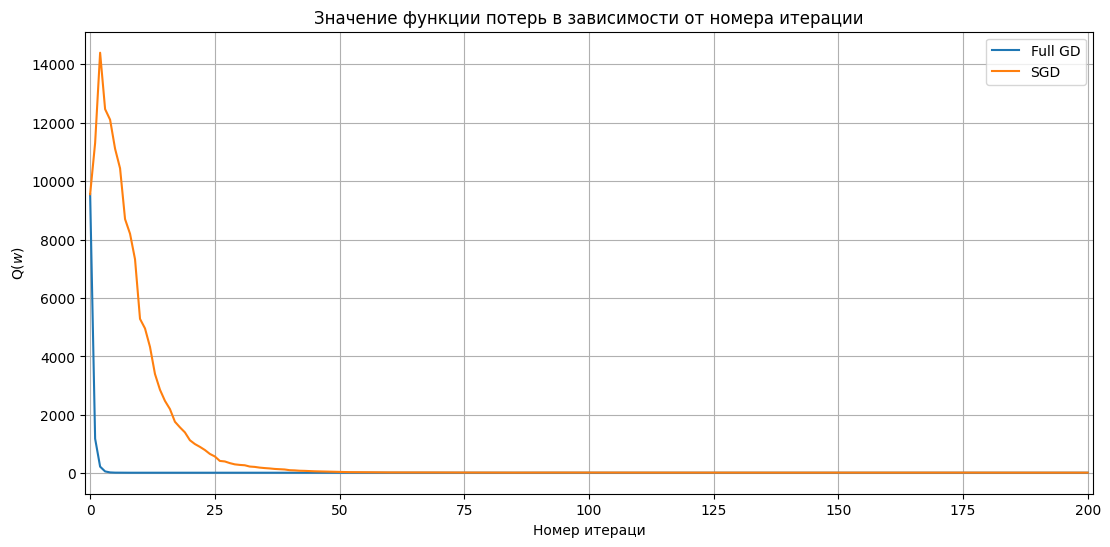

In [16]:
n_features = 50
n_objects = 1000
num_steps = 200
batch_size = 10
w_true = np.random.uniform(-2, 2, n_features)

X = np.random.uniform(-10, 10, (n_objects, n_features))
Y = X.dot(w_true) + np.random.normal(0, 5, n_objects)
from scipy.linalg import norm

step_size_sgd = 1e-2
step_size_gd = 1e-2
w_sgd = np.random.uniform(-4, 4, n_features)
w_gd = w_sgd.copy()
residuals_sgd = [1 / len(X)  * sum((X.dot(w_sgd) - Y) ** 2)]
residuals_gd = [1 / len(X)  * sum((X.dot(w_gd) - Y) ** 2)]

norm_sgd = []
norm_gd = []


for i in range(num_steps):
    step_size = step_size_sgd / ((i + 1) ** 0.51)
    sample = np.random.randint(n_objects, size=batch_size)

    w_sgd -= (
        2
        * step_size
        * np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample])
        / batch_size
    )
    residuals_sgd.append(1 / len(X)  * sum((X.dot(w_sgd) - Y) ** 2))
    norm_sgd.append(norm(np.dot(X[sample].T, np.dot(X[sample], w_sgd) - Y[sample])))

    w_gd -= 2 * step_size_gd * np.dot(X.T, np.dot(X, w_gd) - Y) / Y.shape[0]
    residuals_gd.append(1 / len(X)  * sum((X.dot(w_gd) - Y) ** 2))
    norm_gd.append(norm(np.dot(X.T, np.dot(X, w_gd) - Y)))
plt.figure(figsize=(13, 6))
plt.plot(range(num_steps + 1), residuals_gd, label="Full GD")
plt.plot(range(num_steps + 1), residuals_sgd, label="SGD")

plt.title("Значение функции потерь в зависимости от номера итерации")
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel("Номер итераци")
plt.ylabel(r"Q($w$)")
plt.grid()
plt.show()
# Преимущества SGD не видно, так как ошибка вместо уменьшения увеличивается в начале пути, а потом хоть и начинает падать, но к маленьким значениям приходит намного позже GD

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [17]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.001) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        # Инициализируем веса случайным образом
        n_features = X.shape[1]
        self.w = np.random.randn(n_features)

        # Применяем градиентный спуск
        weights_history = gradient_descent(self.w, X, y, self.loss, self.lr)

        # Сохраняем последнее значение весов
        self.w = weights_history[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [18]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [52]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [53]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [54]:
X_raw.head(10)

,index,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22
5,5,2,NaN,audi,gas,std,two,sedan,fwd,front,...,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25
6,6,1,158.0,audi,gas,std,four,sedan,fwd,front,...,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25
7,7,1,NaN,audi,gas,std,four,wagon,fwd,front,...,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25
8,8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,...,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20
9,10,2,192.0,bmw,gas,std,two,sedan,rwd,front,...,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29


In [55]:
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Заполнение пропусков
print(X_raw.isnull().sum())
# Заменим на среднее значение по столбцу
X_raw = X_raw.fillna(X_raw.mean())
#X_raw[5].value_counts() так мы поняли, что four всречается чаще, и стоит заменить именно на него
X_raw = X_raw.fillna('four')

print(X_raw.isnull().sum())

index     0
0         0
1        37
2         0
3         0
4         0
5         2
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        4
19        4
20        0
21        2
22        2
23        0
24        0
dtype: int64
index    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
dtype: int64


<ipython-input-55-5971b0cfa7ba>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X_raw = X_raw.fillna(X_raw.mean())


In [56]:
# Кодирование категориальных переменных
encoder = OneHotEncoder(handle_unknown='ignore') 
encoder_name = pd.DataFrame(encoder.fit_transform(X_raw[[2]]).toarray())
encoder_gas_or_no = pd.DataFrame(encoder.fit_transform(X_raw[[3]]).toarray())
encoder_std_turbo = pd.DataFrame(encoder.fit_transform(X_raw[[4]]).toarray())
encoder_two_four = pd.DataFrame(encoder.fit_transform(X_raw[[5]]).toarray())
encoder_type = pd.DataFrame(encoder.fit_transform(X_raw[[6]]).toarray())
encoder_wd = pd.DataFrame(encoder.fit_transform(X_raw[[7]]).toarray())
encoder_front_or_not = pd.DataFrame(encoder.fit_transform(X_raw[[8]]).toarray())
encoder_ohc = pd.DataFrame(encoder.fit_transform(X_raw[[14]]).toarray())
encoder_num = pd.DataFrame(encoder.fit_transform(X_raw[[15]]).toarray())
encoder_mpfi = pd.DataFrame(encoder.fit_transform(X_raw[[17]]).toarray())
X_raw_new = X_raw
X_raw_new = X_raw.drop([2, 3, 4, 5, 6, 7, 8, 14, 15, 17], axis=1)
X_raw_new = X_raw_new.join(encoder_name, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_gas_or_no, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_std_turbo, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_two_four, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_type, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_wd, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_front_or_not, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_ohc, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_num, how = 'left', lsuffix='left', rsuffix='right')
X_raw_new = X_raw_new.join(encoder_mpfi, how = 'left', lsuffix='left')
#data.columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'fair cut', 'good cut', 'ideal cut', 'premium cut', 'very good cut', '0 color', '1 color', '2 color', '3 color', '4 color', '5 color', '6 color' , ' 0 clarity', ' 1 clarity', ' 2 clarity', ' 3 clarity', ' 4 clarity', ' 5 clarity', ' 6 clarity', ' 7 clarity']
X_raw_new.columns = X_raw_new.columns.astype(str)
X_raw_new.head(20)




<ipython-input-56-988dfc6159cf>:17: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1left', '0left'} in the result is deprecated and will raise a MergeError in a future version.
  X_raw_new = X_raw_new.join(encoder_std_turbo, how = 'left', lsuffix='left', rsuffix='right')
<ipython-input-56-988dfc6159cf>:19: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1left', '0left'} in the result is deprecated and will raise a MergeError in a future version.
  X_raw_new = X_raw_new.join(encoder_type, how = 'left', lsuffix='left', rsuffix='right')
<ipython-input-56-988dfc6159cf>:21: FutureWarning: Passing 'suffixes' which cause duplicate columns {'1left', '0left'} in the result is deprecated and will raise a MergeError in a future version.
  X_raw_new = X_raw_new.join(encoder_front_or_not, how = 'left', lsuffix='left', rsuffix='right')
<ipython-input-56-988dfc6159cf>:22: FutureWarning: Passing 'suffixes' which cause duplicate columns {'2left'} in the result is de

,index,0left,1left,9left,10left,11left,12left,13left,16left,18left,...,5left,6right,0,1,2,3,4,5,6,7
0,0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,5,2,122.0,99.8,177.3,66.3,53.1,2507,136,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,6,1,158.0,105.8,192.7,71.4,55.7,2844,136,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,7,1,122.0,105.8,192.7,71.4,55.7,2954,136,3.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,8,1,158.0,105.8,192.7,71.4,55.9,3086,131,3.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,10,2,192.0,101.2,176.8,64.8,54.3,2395,108,3.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [57]:
# Разделение на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_raw_new, y, train_size=0.7, random_state=42) 

# Нормализуйте числовые признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [58]:
linear_regression = LinearRegression(MSELoss())
linear_regression.fit(X_train_scaled, y_train)
y_test_pred = linear_regression.predict(X_test_scaled)
y_train_pred = linear_regression.predict(X_train_scaled)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [59]:
from sklearn.metrics import mean_squared_error
mse_test = mean_squared_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
print('mse_train -', mse_train, 'mse_test -', mse_test) # на тесте ошибка в разы выше, чем на трейне, плохо
#print('train_score -', train_score, 'test_score -', test_score)

mse_train - 1344580.0765122091 mse_test - 8486226.152714957


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [60]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        n_objects = X.shape[0]
        loss = 1/n_objects * ((X @ w - y) ** 2).sum() + self.coef * ((w[:-1] ** 2)).sum()
        return loss
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        n_objects = X.shape[0]
        grad = (-2/n_objects) * X.T @ (y - X @ w) + 2 * self.coef * np.hstack((w[:-1], [0]))
        return grad
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [61]:
L2_linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [62]:
L2_linear_regression.fit(X_train_scaled, y_train)
L2_y_test_pred = L2_linear_regression.predict(X_test_scaled)
L2_y_train_pred = L2_linear_regression.predict(X_train_scaled)
L2_mse_test = mean_squared_error(y_test, L2_y_test_pred)
L2_mse_train = mean_squared_error(y_train, L2_y_train_pred)
print("Стало", 'L2_mse_train -', L2_mse_train, 'L2_mse_test -', L2_mse_test)
print("Было", 'mse_train -', mse_train, 'mse_test -', mse_test)
#print('L2_train_score -', train_score, 'L2_test_score -', test_score)
#коэффициент 0.1 дает примерно минимальную ошибку на тестовой выборке (при уменьшении коэффициента она начинает расти и вскоре догоняет mse_test. При этом у нас заметно увеличилась ошибка на train, она уменьшится до mse_train при уменьшении коэффициента. Вообще при уменьшении коэффициента наши значения подступают к значениям MSELoss)

Стало L2_mse_train - 1782878.0069510697 L2_mse_test - 7831629.895610849
Было mse_train - 1344580.0765122091 mse_test - 8486226.152714957


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [63]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        y_pred = X.dot(w)
        abs_diff = np.abs(y - y_pred)
        loss = np.where(abs_diff <= self.eps, 0.5 * (y - y_pred) ** 2, self.eps * (abs_diff - 0.5 * self.eps))
        return loss.mean()
        # Вычислите значение функции потерь при помощи X, y и w и верните его

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        y_pred = X.dot(w)
        abs_diff = np.abs(y - y_pred)
        grad = np.where(abs_diff <= self.eps, -(y - y_pred), -self.eps * np.sign(y - y_pred))
        return X.T.dot(grad) / len(y)
        # Вычислите значение вектора градиента при помощи X, y и w и верните его

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [64]:
Huber_linear_regression = LinearRegression(HuberLoss(1100)) #примерно при этом значении мы получаем минимальную ошибку. При этом ошибка на train заметно больше. 
Huber_linear_regression.fit(X_train_scaled, y_train)
Huber_y_test_pred = Huber_linear_regression.predict(X_test_scaled)
Huber_y_train_pred = Huber_linear_regression.predict(X_train_scaled)
Huber_mse_test = mean_squared_error(y_test, Huber_y_test_pred)
Huber_mse_train = mean_squared_error(y_train, Huber_y_train_pred)
print("Стало", 'Huber_mse_train -', Huber_mse_train, 'Huber_mse_test -', Huber_mse_test)
print("Было", 'mse_train -', mse_train, 'mse_test -', mse_test)

Стало Huber_mse_train - 1671735.692742946 Huber_mse_test - 7688240.707786683
Было mse_train - 1344580.0765122091 mse_test - 8486226.152714957


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

In [85]:
Кот Степан https://memepedia.ru/kot-stepan/

SyntaxError: ignored

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [80]:
import numpy as np

def simulate_annealing(X, y, T=1.0, alpha=0.999, num_iterations=1000):
    # Инициализация начальных весов
    w = np.random.randn(X.shape[1])
    # Вычисление начального значения функции потерь
    loss = np.mean((y - X.dot(w)) ** 2)
    # Повторение до достижения порога температуры
    while T > 1e-5:
        # Генерация новых весов из распределения Стьюдента
        new_w = w + np.random.standard_t(df=3, size=w.shape)
        # Вычисление значения функции потерь для новых весов
        new_loss = np.mean((y - X.dot(new_w)) ** 2)
        # Вычисление разницы между значениями функции потерь
        delta_loss = new_loss - loss
        # Если новые веса дают меньшее значение функции потерь, принять их
        if delta_loss < 0:
            w = new_w
            loss = new_loss
        # Иначе принять новые веса с вероятностью exp(-delta_loss/T)
        else:
            p_accept = np.exp(-delta_loss / T)
            if np.random.rand() < p_accept:
                w = new_w
                loss = new_loss
        # Уменьшение температуры
        T *= alpha
    return w

X = X_raw_new
y = y

# Оптимизация весов с помощью имитации отжига
w_sa = simulate_annealing(X, y)

y_pred_sa = X.dot(w_sa)
y_pred_gd = linear_regression.predict(X_test_scaled)
loss_sa = np.mean((y - y_pred_sa) ** 2)
loss_gd = mean_squared_error(y_test,y_pred_gd)
print("Loss (simulated annealing):", loss_sa)
print("Loss (gradient descent):", loss_gd)


#Как видно из результатов, значения лосса при использовании имитации отжига чуть больше, чем при градиентном спуске. Можно еще уменьшить альфу, но модель тогда обучает долго. 

Loss (simulated annealing): [-15.62767671  -6.63544598  -6.0757179  -39.91192196 -32.06468229
  -9.87833755  17.49785705   5.2926727   65.47119327  -9.76857553
   2.88784114  21.81099803  58.82176044  -0.3163035  -34.72579781
 -19.99142934  49.56624931   0.77133232  39.66976251   0.93253748
  -4.36835846  -1.08560109   0.09602797  -0.88297184 -18.57589438
 -35.51213531 -12.97807867 -13.93422868   2.60675757  -4.07623836
 -12.90021715  12.800031    10.31693516 -15.67694164  10.97223313
  16.85987604   1.98830089 -10.61521157 -14.64763569  -0.90224803
 -18.35428774  19.4440302   22.08298689  12.35319431   5.22333268
  -2.53434928  -1.33248203  -8.22063893  10.62590417  23.92495373
  21.48406164   5.80531845  -8.94560418  14.6170655   49.17629716
  -3.76679293  21.07262796   8.97415712 -21.3218884  -20.41798281
   3.23161799   8.9198854    2.60306947 -13.18543345   6.21114812
 -20.69422977  -6.59474474  -5.77277865  14.8382744    3.59790884
   4.33968252  22.91616474   6.87004622   4.1871